In [107]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import quad

prec = 0.01

In [108]:
def ShowArr(arr, name):
  plt.figure(figsize=(15,2))
  plt.title(name)
  axis = np.arange(len(arr)) 
  plt.plot( axis , arr,'r-')
  plt.grid(True)
  plt.show()

In [109]:
def Convolution(func1 , a1,b1 , func2 , a2,b2):
  arr1 = [func1(i) for i in np.arange(a1,b1,prec)] 
  arr2 = [func2(i) for i in np.arange(a2,b2,prec)]
  res = np.zeros(len(arr1)+len(arr2)-1)
  for i in range(len(arr1)):
    for k in range(len(arr2)):
      res[i+k] += arr1[i]*arr2[k]
  return res

In [110]:
def Correlation(func1 , a1,b1 , func2 , a2,b2):
  arr1 = [func1(i) for i in np.arange(a1,b1,prec)] 
  arr2 = [func2(i) for i in np.arange(a2,b2,prec)]
  res = np.zeros(len(arr1)+len(arr2)-1)
  for i in range(len(arr1)):
    for k in range(len(arr2)):
      res[i+k] += arr1[i]*arr2[len(arr2)-k-1]
  return res

In [111]:
def Convolution_Fourier_Mode(func1 , a1,b1 , func2 , a2,b2):

  arr1 = [func1(i) for i in np.arange(a1,b1,prec)] 
  arr2 = [func2(i) for i in np.arange(a2,b2,prec)]
  arr1_ = np.zeros(len(arr1)+len(arr2)-1)
  arr2_ = np.zeros(len(arr1)+len(arr2)-1)
  arr1_[:len(arr1)]=arr1
  arr2_[:len(arr2)]=arr2
  arr1f = np.fft.fft(arr1_)
  arr2f = np.fft.fft(arr2_)

  res = np.real(np.fft.ifft(arr1f*arr2f))
  
  return res

In [112]:
def Correlation_Fourier_Mode(func1 , a1,b1 , func2 , a2,b2):

  arr1 = [func1(i) for i in np.arange(a1,b1,prec)] 
  arr2 = [func2(i) for i in np.arange(a2,b2,prec)]
  arr1_ = np.zeros(len(arr1)+len(arr2)-1)
  arr2_ = np.zeros(len(arr1)+len(arr2)-1)
  arr1_[:len(arr1)]=arr1
  arr2_[len(arr2_) - len(arr2) :]=arr2
  arr1f = np.fft.fft(arr1_)
  arr2f = np.fft.fft(arr2_)

  res = np.real(np.fft.ifft(arr1f*np.conj(arr2f)))
  
  return res

In [113]:
def Test(func1 , a1,b1, func2 , a2,b2, name1 , name2):
  ShowArr([func1(i) for i in np.arange(a1,b1,prec)],name1 )
  ShowArr([func2(i) for i in np.arange(a2,b2,prec)],name2 )

  arr1 = [func1(i) for i in np.arange(a1,b1,prec)] 
  arr2 = [func2(i) for i in np.arange(a2,b2,prec)]
  
  ShowArr(np.convolve(arr1,arr2) , "np.convolve")
  ShowArr(Convolution_Fourier_Mode(func1 ,a1,b1 , func2 , a2,b2 ) , "fourier_convolve")
  ShowArr(Convolution(func1 ,a1,b1 , func2 , a2,b2 ) , "my_convolve")
  ShowArr(np.correlate(arr1,arr2,mode="full") , "np.correlate")
  ShowArr(Correlation_Fourier_Mode(func1 ,a1,b1 , func2 , a2,b2 ) , "fourier_correlate")
  ShowArr(Correlation(func1 ,a1,b1, func2 , a2,b2 ) , "my_correlate")

In [114]:
def rect(x):
  if np.abs(x) <= 1:
    return 1
  return 0

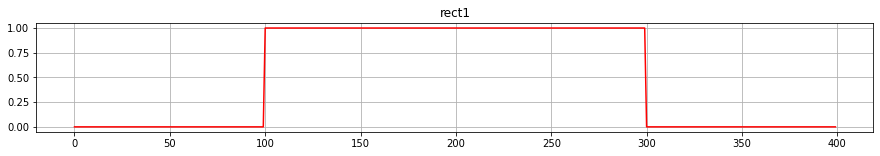

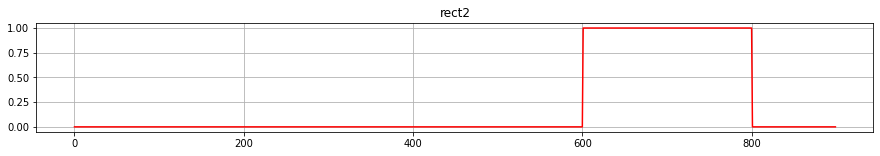

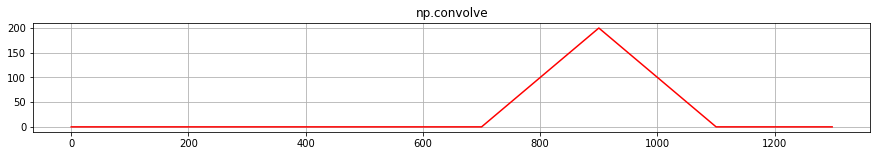

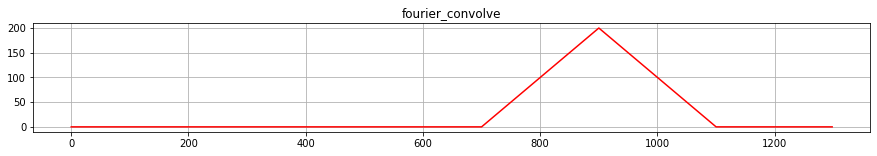

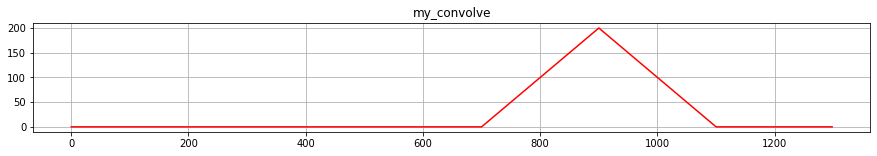

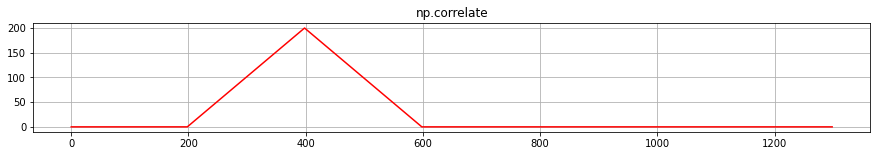

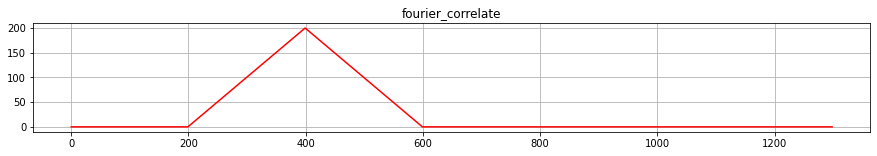

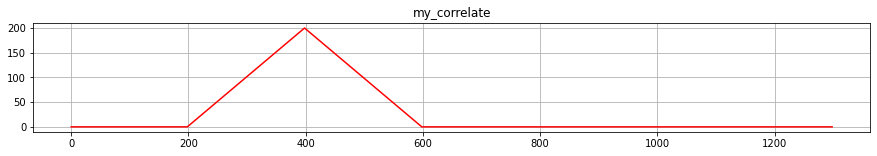

In [115]:
Test(rect ,-2,2 , rect , -7,2 ,"rect1", "rect2")

In [116]:
def triangle(x):
  return max( 1 -abs(x)  , 0)

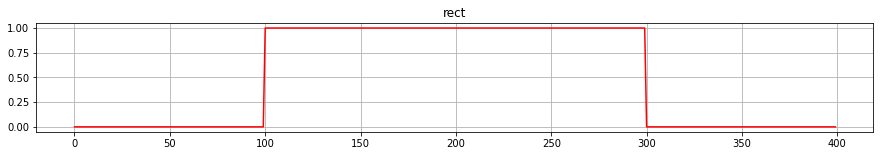

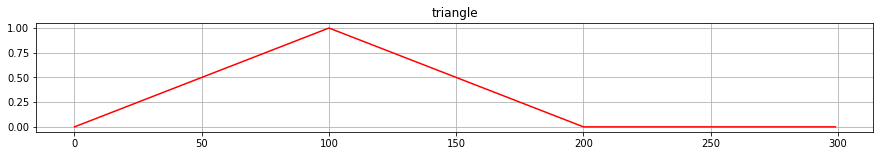

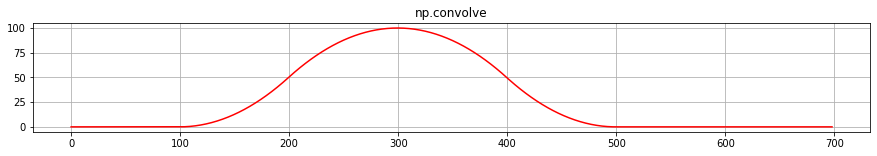

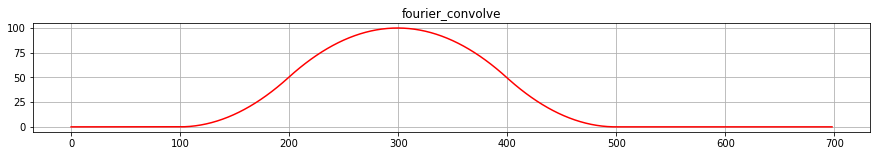

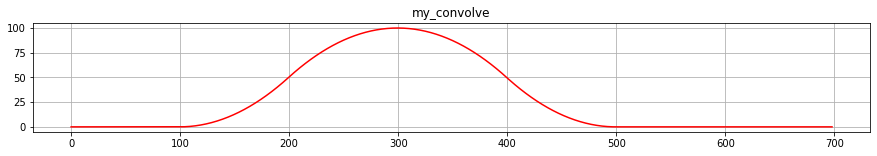

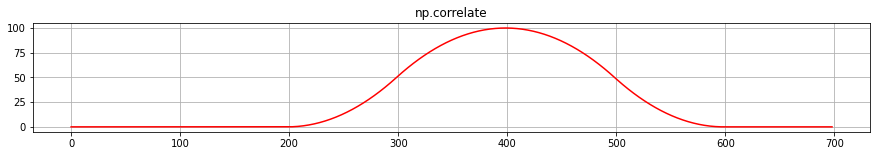

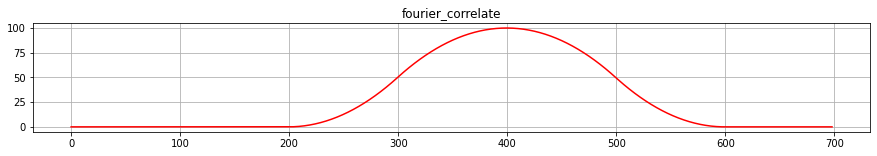

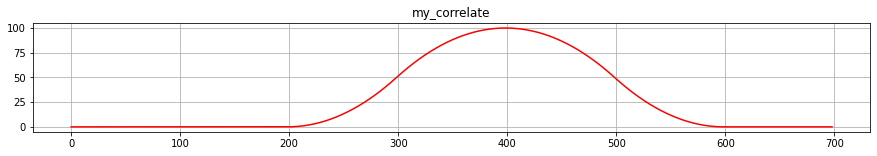

In [117]:
Test(rect ,-2,2 , triangle , -1,2 ,"rect", "triangle")

In [118]:
import random
def randoms(x):
  random.seed(x)
  return random.randint(-100,100)/100

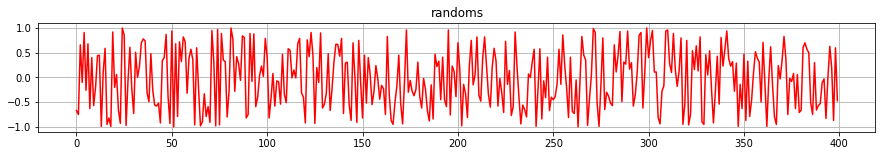

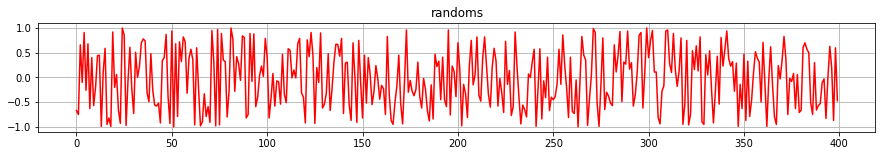

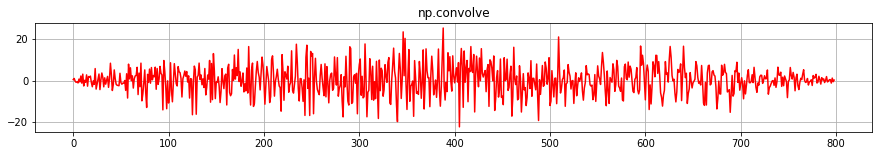

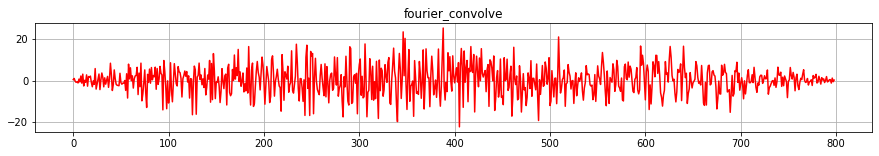

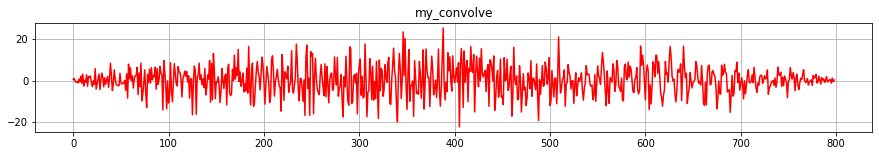

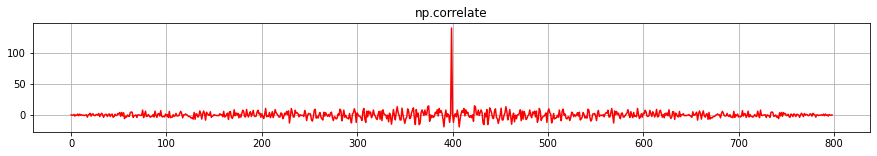

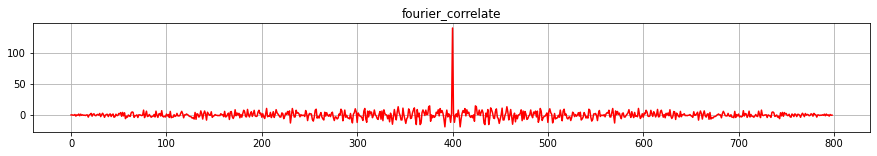

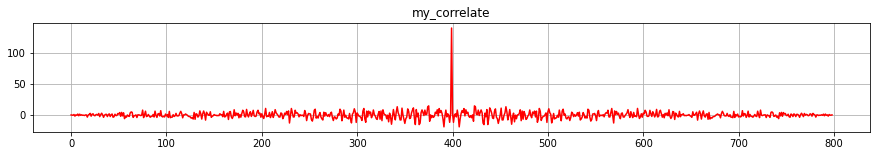

In [119]:
Test(randoms ,-2,2 , randoms , -2,2 ,"randoms", "randoms")

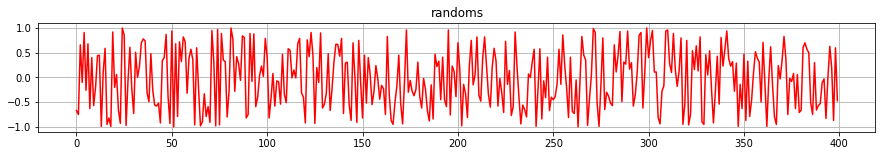

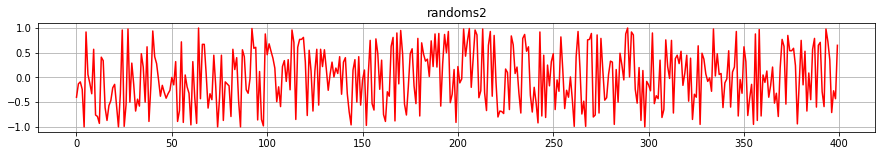

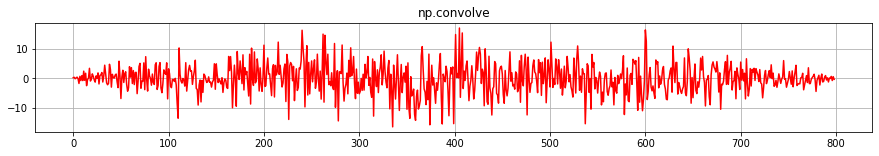

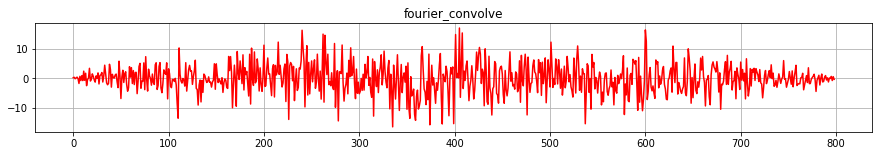

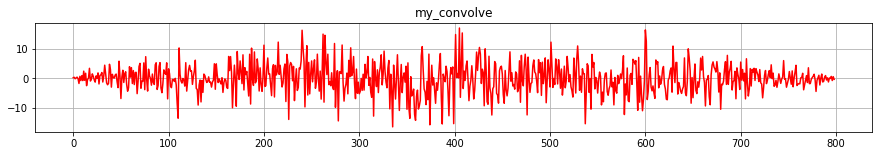

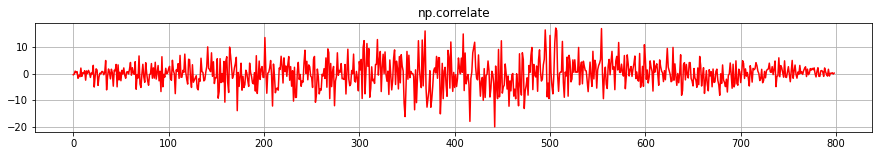

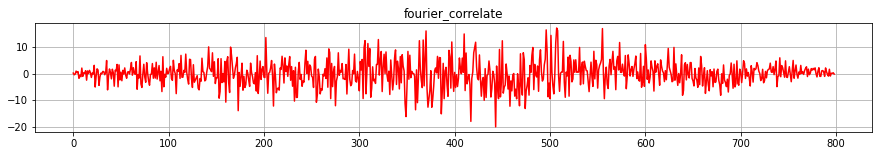

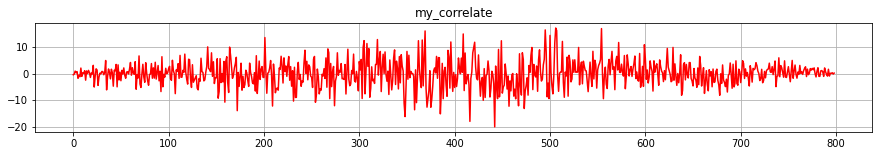

In [120]:
import random
def randoms2(x):
  random.seed(x*x)
  return random.randint(-100,100)/100
Test(randoms ,-2,2 , randoms2 , -2,2 ,"randoms", "randoms2")